In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

In [4]:
#readData
route2 = pd.read_csv('data/route2processeddata.csv')

In [5]:
route2.describe()

,Year,Month,Day,Hour,DBT,RelHum,WSp,Precipitation,Elev,utcivar1,utcivar2,utcivar3,count,Dockability,Releasability,specialdate
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,23410.000000,23410.000000,26280.000000
mean,2018.000000,6.526027,15.720548,11.500000,11.555811,64.517161,5.043877,0.147964,15.018772,6.249769,2.404550,1.887009,0.310540,0.983859,0.940201,0.032877
std,0.816512,3.447917,8.796414,6.922318,10.026865,20.459736,2.472160,0.821503,19.877266,15.407218,16.304980,15.886438,0.748699,0.122158,0.218059,0.178317
min,2017.000000,1.000000,1.000000,0.000000,-18.900000,8.000000,0.000000,0.000000,0.000000,-49.658875,-52.351876,-52.351876,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.750000,3.300000,48.000000,3.100000,0.000000,0.000000,-4.721006,-9.662056,-9.775337,0.000000,1.000000,1.000000,0.000000
50%,2018.000000,7.000000,16.000000,11.500000,11.700000,65.000000,4.600000,0.000000,0.892818,7.640638,3.325151,2.883218,0.000000,1.000000,1.000000,0.000000
75%,2019.000000,10.000000,23.000000,17.250000,20.000000,82.000000,6.700000,0.000000,27.283600,18.841994,15.898786,15.151585,0.000000,1.000000,1.000000,0.000000
max,2019.000000,12.000000,31.000000,23.000000,36.100000,100.000000,21.600000,7.000000,70.856079,40.093279,38.848081,36.689244,10.000000,1.000000,1.000000,1.000000


In [6]:
route2_sub = route2[['DBT','RelHum','WSp','Precipitation','utcivar1','utcivar2','utcivar3','count','Hour','Month']]
route2_sub['utcivar1_squared'] = route2_sub['utcivar1']**2
route2_sub

/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DBT,RelHum,WSp,Precipitation,utcivar1,utcivar2,utcivar3,count,Hour,Month,utcivar1_squared
0,3.9,89.0,6.2,0.0,-8.483754,-12.968296,-12.968296,0.0,0.0,1.0,71.974082
1,3.9,89.0,6.2,0.0,-8.483754,-12.968296,-12.968296,0.0,1.0,1.0,71.974082
2,2.8,92.0,6.2,0.0,-10.088523,-14.588401,-14.588401,0.0,2.0,1.0,101.778296
3,2.8,92.0,7.2,0.0,-12.381234,-16.789368,-16.789368,0.0,3.0,1.0,153.294955
4,2.8,92.0,7.7,0.0,-13.423521,-17.791345,-17.791345,0.0,4.0,1.0,180.190916
...,...,...,...,...,...,...,...,...,...,...,...
26275,3.9,79.0,3.6,1.0,-1.225549,-6.136164,-6.136164,2.0,19.0,12.0,1.501970
26276,3.9,79.0,5.1,0.0,-5.788195,-10.503150,-10.503150,0.0,20.0,12.0,33.503201
26277,3.9,79.0,4.1,0.0,-2.830154,-7.671634,-7.671634,0.0,21.0,12.0,8.009772
26278,4.4,76.0,4.6,0.0,-3.717090,-8.505710,-8.505710,0.0,22.0,12.0,13.816758


In [7]:
route2_sub.corr()

,DBT,RelHum,WSp,Precipitation,utcivar1,utcivar2,utcivar3,count,Hour,Month,utcivar1_squared
DBT,1.000000,0.145869,-0.126773,-0.002905,0.936884,0.948431,0.947098,0.144658,7.425626e-02,2.613576e-01,0.405535
RelHum,0.145869,1.000000,-0.195347,0.188317,0.187956,0.199253,0.212996,-0.072458,-1.158093e-01,5.854681e-02,-0.159970
WSp,-0.126773,-0.195347,1.000000,0.047298,-0.425193,-0.396423,-0.409207,-0.005834,7.000228e-02,-1.033280e-01,0.076471
Precipitation,-0.002905,0.188317,0.047298,1.000000,-0.028975,-0.024678,-0.019663,-0.014894,1.264209e-01,4.991530e-03,-0.034093
utcivar1,0.936884,0.187956,-0.425193,-0.028975,1.000000,0.998671,0.997594,0.125104,3.658116e-02,2.549678e-01,0.303879
utcivar2,0.948431,0.199253,-0.396423,-0.024678,0.998671,1.000000,0.998623,0.125370,3.746106e-02,2.548239e-01,0.334905
utcivar3,0.947098,0.212996,-0.409207,-0.019663,0.997594,0.998623,1.000000,0.126669,3.911861e-02,2.603085e-01,0.323935
count,0.144658,-0.072458,-0.005834,-0.014894,0.125104,0.125370,0.126669,1.000000,2.747528e-01,4.764429e-02,0.041291
Hour,0.074256,-0.115809,0.070002,0.126421,0.036581,0.037461,0.039119,0.274753,1.000000e+00,2.605559e-19,0.010477
Month,0.261358,0.058547,-0.103328,0.004992,0.254968,0.254824,0.260309,0.047644,2.605559e-19,1.000000e+00,0.026660


array([[<AxesSubplot:xlabel='DBT', ylabel='DBT'>,
        <AxesSubplot:xlabel='RelHum', ylabel='DBT'>,
        <AxesSubplot:xlabel='WSp', ylabel='DBT'>,
        <AxesSubplot:xlabel='Precipitation', ylabel='DBT'>,
        <AxesSubplot:xlabel='utcivar1', ylabel='DBT'>,
        <AxesSubplot:xlabel='utcivar2', ylabel='DBT'>,
        <AxesSubplot:xlabel='utcivar3', ylabel='DBT'>,
        <AxesSubplot:xlabel='count', ylabel='DBT'>,
        <AxesSubplot:xlabel='Hour', ylabel='DBT'>,
        <AxesSubplot:xlabel='Month', ylabel='DBT'>,
        <AxesSubplot:xlabel='utcivar1_squared', ylabel='DBT'>],
       [<AxesSubplot:xlabel='DBT', ylabel='RelHum'>,
        <AxesSubplot:xlabel='RelHum', ylabel='RelHum'>,
        <AxesSubplot:xlabel='WSp', ylabel='RelHum'>,
        <AxesSubplot:xlabel='Precipitation', ylabel='RelHum'>,
        <AxesSubplot:xlabel='utcivar1', ylabel='RelHum'>,
        <AxesSubplot:xlabel='utcivar2', ylabel='RelHum'>,
        <AxesSubplot:xlabel='utcivar3', ylabel='RelHum'>,
    

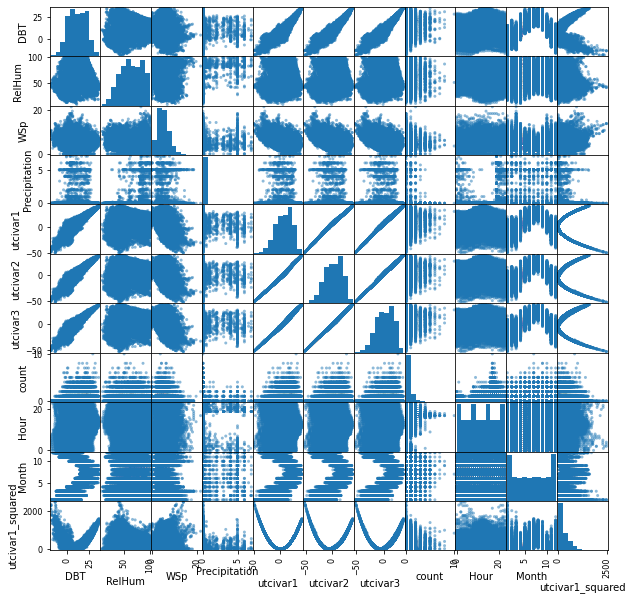

In [8]:
pd.plotting.scatter_matrix(route2_sub,figsize = (10,10))


In [9]:
lr1 = LinearRegression()
lr1.fit(route2[['utcivar1']], route2['utcivar2'])
print("utci var 2 vs utci var 1", lr1.coef_, lr1.intercept_)

lr2 = LinearRegression()
lr2.fit(route2[['utcivar2']], route2['utcivar3'])
print("utci var 3 vs utci var 2", lr2.coef_, lr2.intercept_)

lr3 = LinearRegression()
lr3.fit(route2[['utcivar1']], route2['utcivar3'])
print("utci var 3 vs utci var 1", lr3.coef_, lr3.intercept_)

utci var 2 vs utci var 1 [1.0568626] -4.200596453609034
utci var 3 vs utci var 2 [0.97298875] -0.452591214164348
utci var 3 vs utci var 1 [1.02862313] -4.541647407435182


In [10]:
route2_sub[route2_sub['count'] != 0].describe()

,DBT,RelHum,WSp,Precipitation,utcivar1,utcivar2,utcivar3,count,Hour,Month,utcivar1_squared
count,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000
mean,14.756762,61.093313,5.042406,0.138893,10.667734,7.090668,6.416688,1.541556,15.516623,6.856441,307.751276
std,9.560612,19.907665,2.248999,0.787511,13.927935,14.990009,14.530930,0.940750,4.758836,3.086782,306.097996
min,-14.400000,10.000000,0.000000,0.000000,-42.094466,-45.240200,-45.240200,1.000000,0.000000,1.000000,0.000185
25%,7.200000,46.000000,3.600000,0.000000,0.679094,-4.050565,-4.279648,1.000000,13.000000,5.000000,45.971652
50%,15.600000,61.000000,4.600000,0.000000,12.642558,9.027668,8.361090,1.000000,17.000000,7.000000,218.275118
75%,22.200000,77.000000,6.200000,0.000000,21.665709,19.132708,18.206736,2.000000,19.000000,9.000000,486.385238
max,35.600000,100.000000,21.600000,7.000000,39.579247,38.298424,36.326626,10.000000,23.000000,12.000000,1771.944068


In [11]:
route2_sub.describe()

,DBT,RelHum,WSp,Precipitation,utcivar1,utcivar2,utcivar3,count,Hour,Month,utcivar1_squared
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,2.628000e+04
mean,11.555811,64.517161,5.043877,0.147964,6.249769,2.404550,1.887009,0.310540,11.500000,6.526027,2.764330e+02
std,10.026865,20.459736,2.472160,0.821503,15.407218,16.304980,15.886438,0.748699,6.922318,3.447917,3.009226e+02
min,-18.900000,8.000000,0.000000,0.000000,-49.658875,-52.351876,-52.351876,0.000000,0.000000,1.000000,1.413760e-07
25%,3.300000,48.000000,3.100000,0.000000,-4.721006,-9.662056,-9.775337,0.000000,5.750000,4.000000,3.982257e+01
50%,11.700000,65.000000,4.600000,0.000000,7.640638,3.325151,2.883218,0.000000,11.500000,7.000000,1.723401e+02
75%,20.000000,82.000000,6.700000,0.000000,18.841994,15.898786,15.151585,0.000000,17.250000,10.000000,4.258301e+02
max,36.100000,100.000000,21.600000,7.000000,40.093279,38.848081,36.689244,10.000000,23.000000,12.000000,2.466004e+03


IndexError: index 5 is out of bounds for axis 0 with size 5

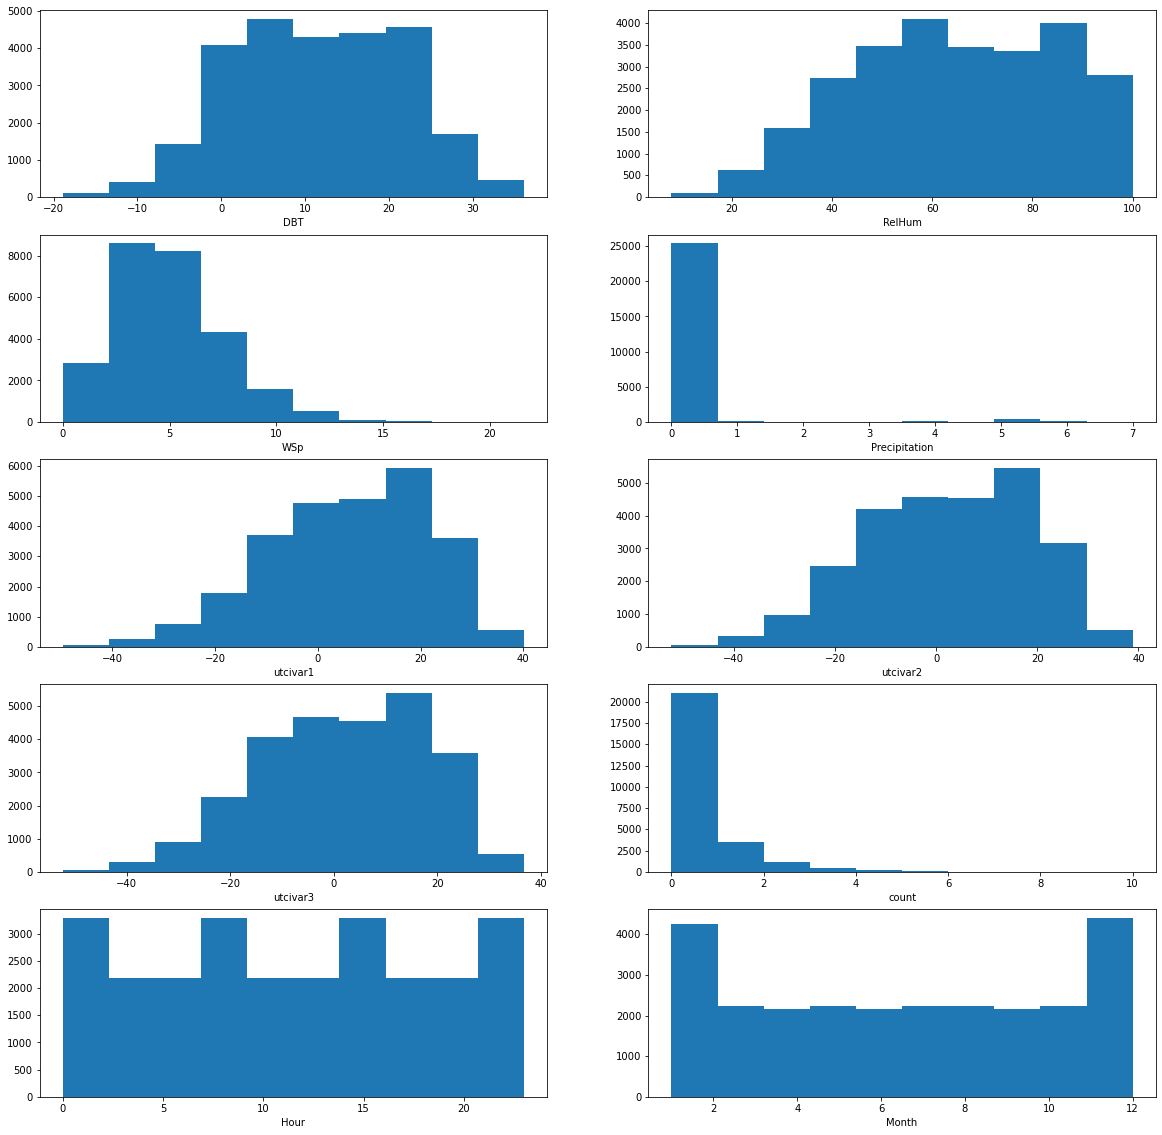

In [12]:
#histograms
fig,axs = plt.subplots(5,2,figsize =(20,20))

curCol = 0 
curRow = 0 

for col in route2_sub.columns:
    axs[curRow,curCol].hist(route2[col])
    axs[curRow,curCol].set_xlabel(str(col))
    if curCol == 0: 
        curCol += 1
    else:
        curCol = 0
        curRow += 1
#plt.hist(route2_sub[route2_sub['count'] != 0]['count'])

for i in range(0,24):
    print(route2_sub[route2_sub['Hour'] == i]['Hour'].shape)

IndexError: index 5 is out of bounds for axis 0 with size 5

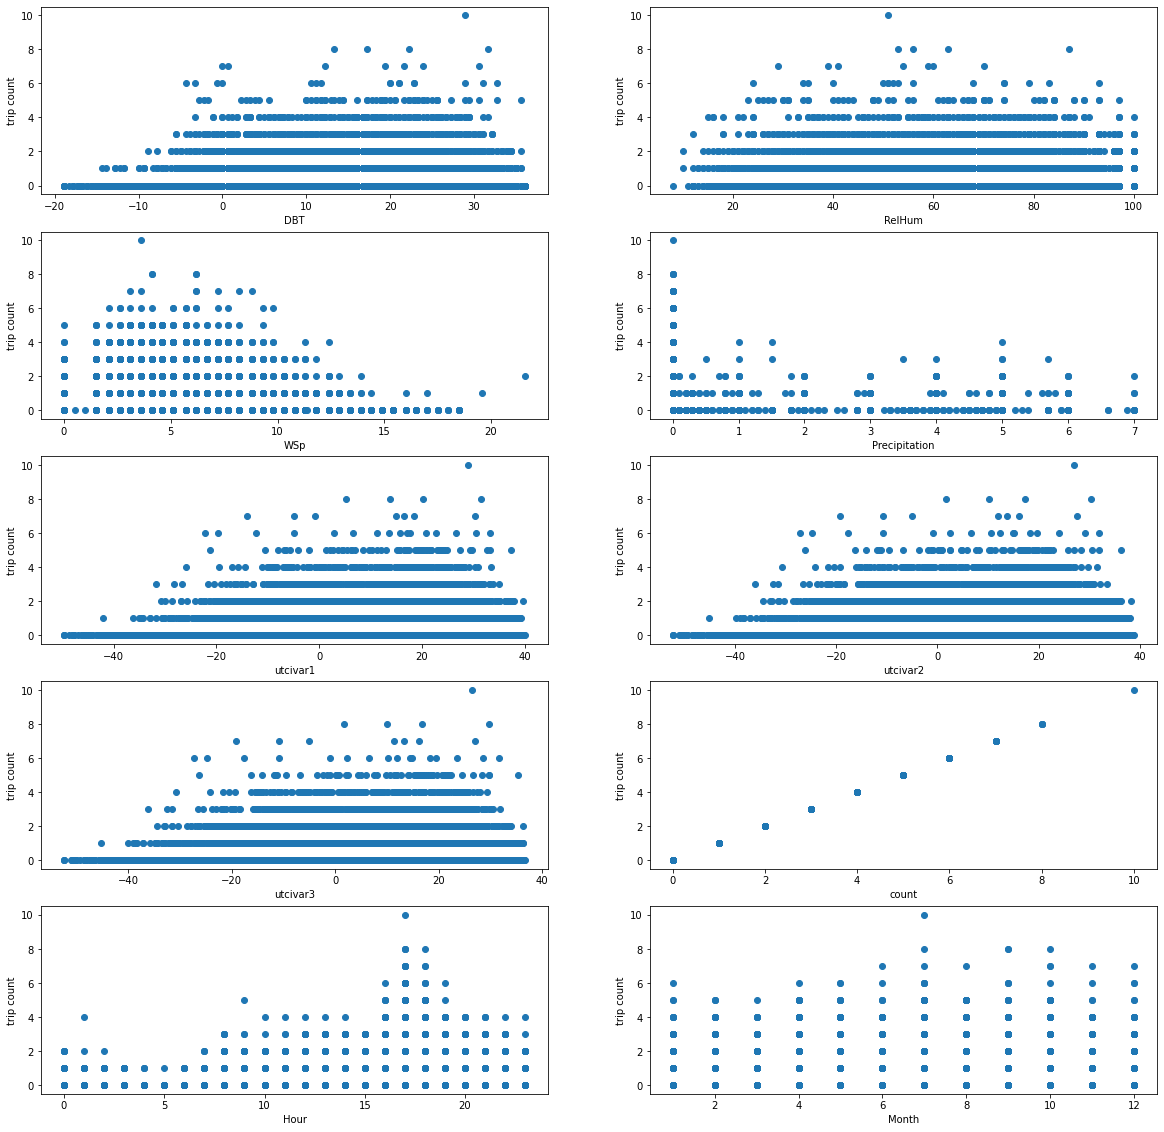

In [13]:
#histograms
fig,axs = plt.subplots(5,2,figsize =(20,20))

curCol = 0 
curRow = 0 

for col in route2_sub.columns:
    axs[curRow,curCol].scatter(route2[col],route2['count'])
    axs[curRow,curCol].set_xlabel(str(col))
    axs[curRow,curCol].set_ylabel('trip count')
    
    if curCol == 0: 
        curCol += 1
    else:
        curCol = 0
        curRow += 1



In [14]:
regressor1 = LinearRegression()
regressor1.fit(route2_sub[['utcivar1']],route2_sub['count'])
print('regressor1',regressor1.coef_,regressor1.intercept_)

regressor2 = LinearRegression()
regressor2.fit(route2_sub[['utcivar1','Hour']],route2_sub['count'])
print('regressor2',regressor2.coef_,regressor2.intercept_)

regressor1 [0.0060793] 0.27254612658164973
regressor2 [0.00559838 0.02926068] -0.06094606392045865


Text(0.5, 0, 'Hour')

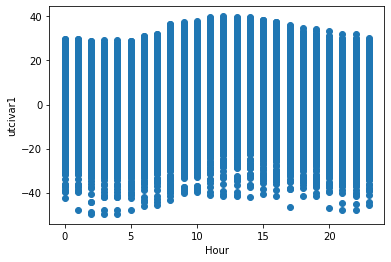

In [15]:
plt.figure()
plt.scatter(route2_sub['Hour'],route2_sub['utcivar1'])
plt.ylabel('utcivar1')
plt.xlabel('Hour')